In [1]:
import numpy as np  # Import numpy for numerical operations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualizations
sns.set()  # Set seaborn style

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.linear_model import LinearRegression  # Import LinearRegression for linear regression modeling
from sklearn.metrics import mean_squared_error  # Import mean_squared_error for model evaluation
from sklearn import metrics  # Import metrics for additional model evaluation

In [2]:
path = r'C:\Users\User\Desktop\Rashad\DATA\Baku-house-data.csv'  # Define the file path

# Read the CSV file into a Data
data = pd.read_csv(path)

# Display the Data
data

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.0,210 000
1,8-ci mikrorayon,65.0,2,7.0,134 000
2,Yeni Gunesli,98.2,3,13.0,122 800
3,Nasimi r,248.0,5,15.0,1 000 000
4,Baku White City,126.1,3,NaN,453 960
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.0,118 000
3196,Nariman Narimanov m,85.0,3,9.0,200 000
3197,Qara Qarayev m,123.0,3,9.0,195 000
3198,Qara Qarayev m,70.0,2,8.0,124 000


In [3]:
# This line of code generates descriptive statistics for my data
# It helps you understand the distribution, central tendency, and spread of my data.
# By including 'all', it ensures that statistics are calculated for both numeric and non-numeric columns.
data.describe(include='all')

,Location,sq.m,number_of_rooms,floor,price (AZN)
count,2986,3200.000000,3200.000000,2783.000000,3200
unique,76,NaN,NaN,NaN,631
top,Nasimi r,NaN,NaN,NaN,135 000
freq,210,NaN,NaN,NaN,44
mean,NaN,115.537625,2.852813,8.246497,NaN
std,NaN,73.159192,0.988473,5.053591,NaN
min,NaN,7.000000,1.000000,1.000000,NaN
25%,NaN,70.000000,2.000000,4.000000,NaN
50%,NaN,100.000000,3.000000,7.000000,NaN
75%,NaN,140.000000,3.000000,12.000000,NaN


In [4]:
# This line displays the data types of each column in the Data.
data.dtypes

Location            object
sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)         object
dtype: object

In [5]:
# This line updates the Data with the cleaned and converted 'price (AZN)' column.
data['price (AZN)'] = data['price (AZN)'].str.replace(' ', '').astype(float)
data

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.0,210000.0
1,8-ci mikrorayon,65.0,2,7.0,134000.0
2,Yeni Gunesli,98.2,3,13.0,122800.0
3,Nasimi r,248.0,5,15.0,1000000.0
4,Baku White City,126.1,3,NaN,453960.0
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.0,118000.0
3196,Nariman Narimanov m,85.0,3,9.0,200000.0
3197,Qara Qarayev m,123.0,3,9.0,195000.0
3198,Qara Qarayev m,70.0,2,8.0,124000.0


In [6]:
# This line displays the updated data types of each column in the Data.
data.dtypes

Location            object
sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)        float64
dtype: object

In [7]:
# This line calculates the number of duplicated rows, which helps identify and possibly remove any duplicate entries,maintaining data integrity.
data.duplicated().sum()

697

In [8]:
# This line removes duplicated rows from the Data, ensuring data integrity.
data.drop_duplicates()

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.0,210000.0
1,8-ci mikrorayon,65.0,2,7.0,134000.0
2,Yeni Gunesli,98.2,3,13.0,122800.0
3,Nasimi r,248.0,5,15.0,1000000.0
4,Baku White City,126.1,3,NaN,453960.0
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.0,118000.0
3196,Nariman Narimanov m,85.0,3,9.0,200000.0
3197,Qara Qarayev m,123.0,3,9.0,195000.0
3198,Qara Qarayev m,70.0,2,8.0,124000.0


In [9]:
# This line calculates the number of missing values in each column of the Data, helping to identify areas where data may be incomplete.
data.isna().sum()

Location           214
sq.m                 0
number_of_rooms      0
floor              417
price (AZN)          0
dtype: int64

In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        # For object type columns, fill missing values with the mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        # For numeric type columns, fill missing values with the mean
        data[column].fillna(data[column].mean(), inplace=True)

# This loop iterates through each column in the DataFrame, checking if it's of object type or numeric type. 
# For object type columns, missing values are filled with the mode (most frequent value).
# For numeric type columns, missing values are filled with the mean.
# This ensures that missing values are appropriately handled for both categorical and numerical data.

In [12]:
# Calculate correlation matrix for numerical columns
corr_data = data[data.select_dtypes(include=['int', 'float']).columns].corr()
corr_data  # This line calculates the correlation matrix for numerical columns in the Data.

,sq.m,number_of_rooms,floor,price (AZN)
sq.m,1.000000,0.818291,0.170466,0.772138
number_of_rooms,0.818291,1.000000,0.116080,0.609819
floor,0.170466,0.116080,1.000000,0.104602
price (AZN),0.772138,0.609819,0.104602,1.000000


<Axes: >

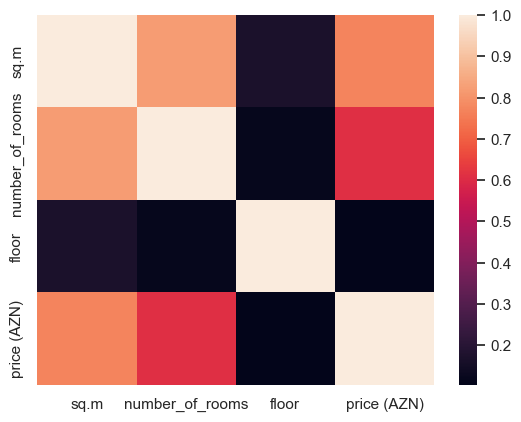

In [13]:
# Display heatmap of correlation matrix
sns.heatmap(corr_data)

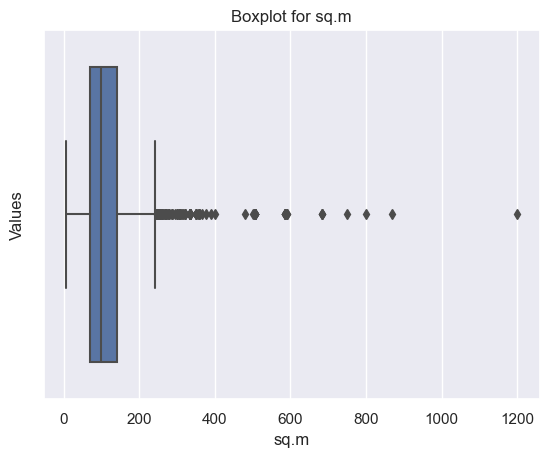

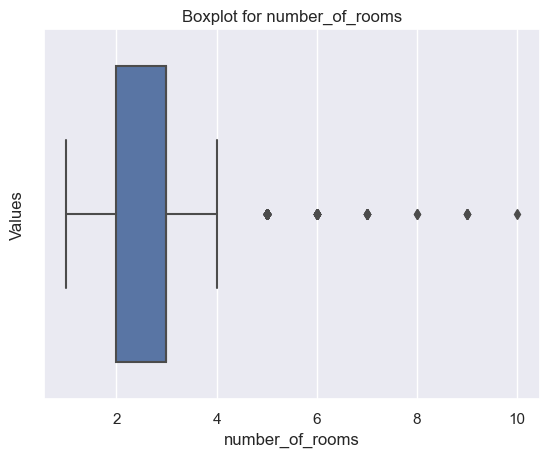

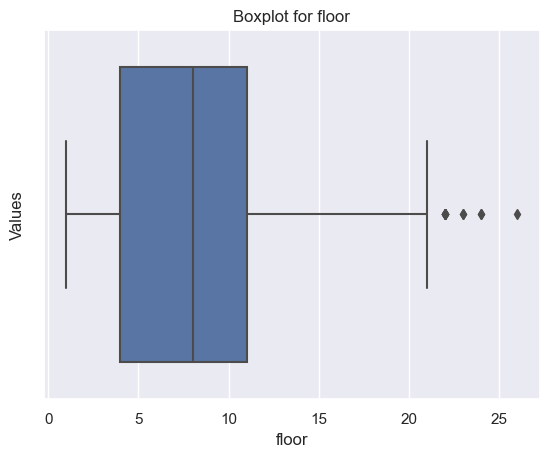

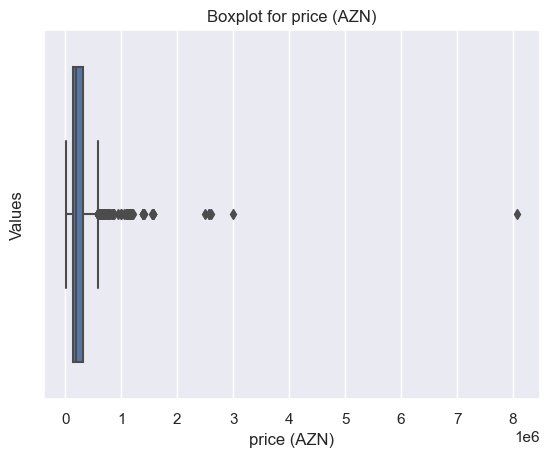

In [19]:
# Visualize boxplots for numerical columns
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[column], data=data)
        plt.title(f"Boxplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Values")
        plt.show()


In [20]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create a copy of the DataFrame with only numerical columns
new_data = data[numeric_columns].copy()

In [21]:
# Calculate the interquartile range (IQR) for each numerical column
iqr = new_data.quantile(0.75) - new_data.quantile(0.25)

# Calculate the lower bound for outlier detection
lower = new_data.quantile(0.25) - 1.5 * iqr

# Calculate the upper bound for outlier detection
upper = new_data.quantile(0.75) + 1.5 * iqr

In [26]:
# Replace outliers in 'sq.m' column with upper bound value
new_data['sq.m'] = np.where(new_data['sq.m'] > upper['sq.m'], upper['sq.m'], new_data['sq.m'])

# Replace outliers in 'floor' column with upper bound value
new_data['floor'] = np.where(new_data['floor'] > upper['floor'], upper['floor'], new_data['floor'])

# Replace outliers in 'number_of_rooms' column with upper bound value
new_data['number_of_rooms'] = np.where(new_data['number_of_rooms'] > upper['number_of_rooms'],
                                       upper['number_of_rooms'], new_data['number_of_rooms'])

# Replace outliers in 'price (AZN)' column with upper bound value
new_data['price (AZN)'] = np.where(new_data['price (AZN)'] > upper['price (AZN)'],
                                    upper['price (AZN)'], new_data['price (AZN)'])

In [27]:
data = new_data.copy()

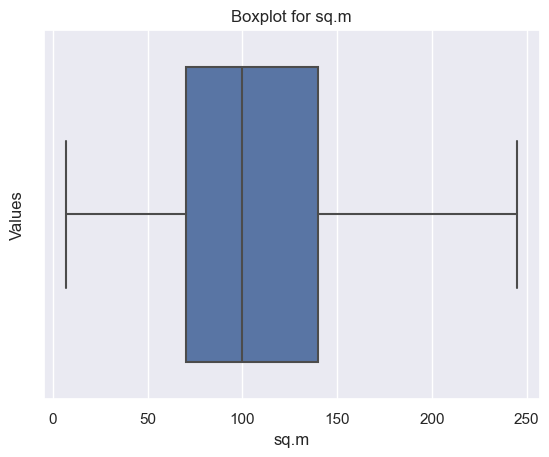

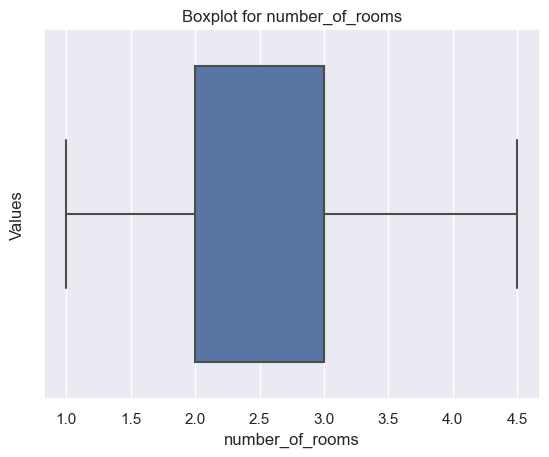

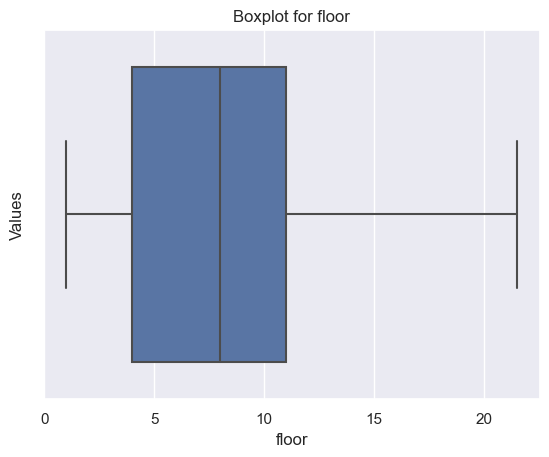

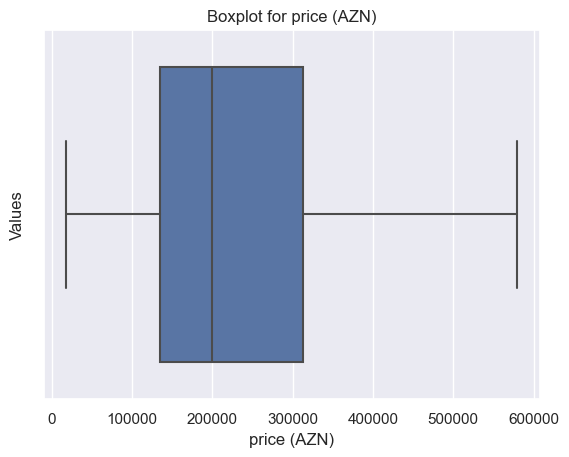

In [28]:
# Visualize boxplots for numerical columns after outlier treatment
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[column], data=data)
        plt.title(f"Boxplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Values")
        plt.show()

In [29]:
# Select features (X) and target variable (y)
x = data[['sq.m','number_of_rooms']]  # Features: 'sq.m' (size) and 'number_of_rooms' number
y = data['price (AZN)']     # Target variable: 'price (AZN)'

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Initialize and train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict target variable for the test set
y_pred = reg.predict(X_test)
y_pred

array([372242.89395472, 149851.16123218, 222106.24917581, 191425.63587707,
       156024.92822467,  90849.98181151, 120076.92247143, 147491.11405535,
       548793.24494773, 551606.47939355, 154807.26030352, 154807.26030352,
       197052.10476871,  91359.63557961, 374565.29679881, 274027.287066  ,
       219236.54823088, 152211.20840901, 548793.24494773, 215026.10764533,
       111382.39224991, 114450.45357978, 120624.22057227, 274027.287066  ,
       443044.30925952, 187611.91606141, 197052.10476871, 276623.33896051,
       197052.10476871, 191425.63587707, 114450.45357978, 286733.89748813,
       276623.33896051, 226826.34352947, 207945.96611485, 198505.77740755,
       334482.1391255 , 167825.1641088 , 219472.55294857, 172271.60941203,
       343922.3278328 , 167825.1641088 , 149851.16123218,  75236.02611172,
       142771.0197017 , 124797.01682508, 149851.16123218, 114450.45357978,
       344828.7023708 , 119170.54793343, 299987.80601109, 176085.32922769,
       178265.83818594, 2

In [33]:
# Add actual and predicted values to the test set
X_test['actual'] = y_test
X_test['predicted'] = y_pred
X_test

,sq.m,number_of_rooms,actual,predicted
2384,169.0,4.0,155000.0,372242.893955
2538,70.0,2.0,114000.0,149851.161232
2176,103.0,3.0,207000.0,222106.249176
897,90.0,3.0,164000.0,191425.635877
214,75.0,3.0,175000.0,156024.928225
...,...,...,...,...
2936,80.0,3.0,250000.0,167825.164109
1468,77.0,3.0,147000.0,160745.022578
561,58.0,2.0,128000.0,121530.595110
282,67.2,2.0,168000.0,143243.029137


In [34]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Print model performance for testing set
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 47389.37431263083
MSE is 4294142767.493337
RMSE is 65529.70904477859
R2 score is 0.7643147230772378


In [35]:
# Predict target variable for the training set
y_pred_train = reg.predict(X_train)

# Calculate evaluation metrics for training set
mae_tr = metrics.mean_absolute_error(y_train, y_pred_train)
mse_tr = metrics.mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
r2_tr = metrics.r2_score(y_train, y_pred_train)

# Print model performance for training set
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for training set
--------------------------------------
MAE is 51346.801731393825
MSE is 4983721539.162138
RMSE is 70595.47817787013
R2 score is 0.7441944317386324
